# Regresja

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Generujemy dane za pomocą podmodułu ```datasets```. Tworzymy 50 próbek z 50 cechami (```X_all```), z których tylko 10 jest istotnych dla przewidywania wyników z ```y_all```.

In [4]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10, random_state=10)

In [10]:
print(X_all.shape)
print(y_all.shape)

(50, 50)
(50,)


Dzielimy zbiór danych na zbiór uczący i zbiór na którym przetestujemy model. W tym celu korzystamy z ```model_selection.train_test_split```.

In [11]:
X_train,X_test,y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

W celu przeprowadzenia regresji tworzymy najpierw model będący *obiektem* klasy ```linear_model.LinearRegression```. Najważniejsze metody i atrybuty:

* ```fit()``` - dopasowuje model do danych (uczących)
* ```predict()``` - przewiduje wynik dla nowych danych
* ```coef_``` - pokazuje dopasowane parametry modelu


In [12]:
model=linear_model.LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

Obliczmy średnią kwadratową błędów modelu od danych (odchylenie standardowe), na których się uczył.

In [30]:
def sse(dane1,dane2):
    return np.sqrt(np.sum((dane1-dane2)**2)/dane1.size)
sse(y_train,model.predict(X_train))
# to samo co np.sqrt(metrics.mean_squared_error(y_train,model.predict(X_train)))
# lub (y_train-model.predict(X_train)).std()

4.917479369466188e-13

Błąd jest bardzo mały, ponieważ model jest nadmiernie dopasowany (25 próbek z 50 cechami - tj. 50 niewiadomych i 25 równań). Z tego względu nie nadaje się on do przewidywania danych spoza tego zbioru. Sprawdźmy błąd na zbiorze testowym.

In [25]:
sse(y_test,model.predict(X_test))

326316.2661886166

Uwaga: inną miarą dopasowania, wbudowaną w sklearn, jest obliczanie współczynike $R^2$ metodą ```LinearRegression.score()``` naszego modelującego obiektu.

In [26]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.6947218302905946


In [27]:
def rysuj_reszty_i_współczynniki(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("Numer próbki")
    axes[0].set_ylabel("Reszta")
    axes[0].set_title("Zbiór uczący")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("Numer próbki")
    axes[1].set_ylabel("Reszta")
    axes[1].set_title("Zbiór testowy")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("Numer współczynnika")
    axes[2].set_ylabel("Wartość współczynnika")
    fig.tight_layout()
    return fig, axes

(<Figure size 864x216 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Zbiór uczący'}, xlabel='Numer próbki', ylabel='Reszta'>,
        <AxesSubplot:title={'center':'Zbiór testowy'}, xlabel='Numer próbki', ylabel='Reszta'>,
        <AxesSubplot:xlabel='Numer współczynnika', ylabel='Wartość współczynnika'>],
       dtype=object))

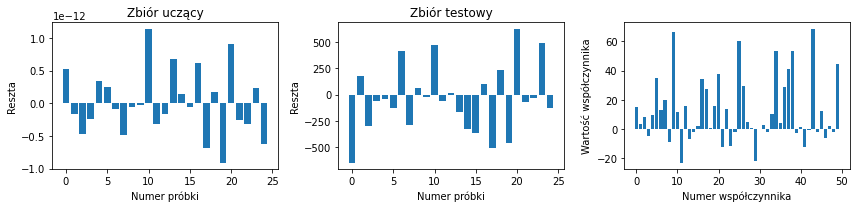

In [29]:
rysuj_reszty_i_współczynniki(y_train-model.predict(X_train),y_test-model.predict(X_train),model.coef_)

## Sposoby poprawienia modelu regresji
Model domyślnie dopasowuje się metodą najmniejszych kwadratów, czyli minimalizuje funkcję sse. Możemy zmienić tę 'taktykę' dodając 'karę' za jakość dobranych współczynników:
* metoda LASSO, ```linear_model.Lasso``` (preferuje jak najmniej niezerowych współczynników)
* regresja grzebietowa, ```linear_model.Ridge``` (preferuje jak najmniejsze współczynniki)

## Zadanie domowe
* wygeneruj dane do regresji liniowej z 100 próbkami, 40 cechami, w tym 20 istotnymi i wybranym random_state
* przeprowadź analizę metodą Lasso dla różnych parametrów $\alpha$ i spróbuj określić jaki współczynnik jest najlepszy dla przewidywania przyszłych wyników

In [87]:
X_all, y_all = datasets.make_regression(n_samples=100, n_features=40, n_informative=20, random_state=123)
X_train, X_test, y_train, y_test=model_selection.train_test_split(X_all,y_all)

In [93]:
alphas=np.logspace(-4,2,200)
ocena_train = []
ocena_test = []

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    resid = y_train - model.predict(X_train)
    ocena_train.append(sum(resid**2))
    resid = y_test - model.predict(X_test)
    ocena_test.append(sum(resid**2))

    

Text(0, 0.5, 'Suma kwadratów błędów')

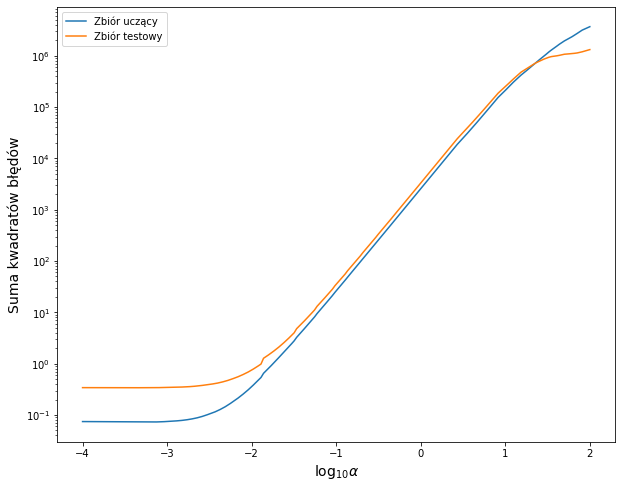

In [94]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot()

ax.semilogy(np.log10(alphas), ocena_train, label="Zbiór uczący")
ax.semilogy(np.log10(alphas), ocena_test, label="Zbiór testowy")
ax.legend(loc=0)
ax.set_xlabel(r"$\log_{10}\alpha$", fontsize=14)
ax.set_ylabel(r"Suma kwadratów błędów", fontsize=14)

In [97]:
best_alpha=alphas[np.argmin(ocena_test)]
model=linear_model.Lasso(alpha=best_alpha)
model.fit(X_train,y_train)

Lasso(alpha=0.0003036771118035457)

In [98]:
print(f'Liczba niezerowych współczynników: {(np.round(model.coef_,5)!=0).sum()}')

Liczba niezerowych współczynników: 39


# Klasyfikacja
Dokonamy klasyfikacji (przypisania do grup) danych na podstawie zbioru danych cech irysów. Korzystamy z modelu ```linear_model.LogisticRegression```. Można też wykorzystać w tym celu:
* drzewa decyzyjne ```tree.DecisionTreeClassifier```
* metodę najbliższego sąsiada ```neighbors.KNeighborsClassifier```

In [36]:
irysy=datasets.load_iris()

In [37]:
type(irysy) #to jakiś nieznany nam obiekt - tzw. kontener z danymi

sklearn.utils.Bunch

In [38]:
print(irysy)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [41]:
print(irysy.target_names)
print(irysy.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Właściwe dane oraz przewidywane wyniki mamy w ```irysy.data``` oraz ```irysy.target```

In [47]:
print(irysy.data.shape)
print(irysy.target.shape)

(150, 4)
(150,)


In [51]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(irysy.data,irysy.target,train_size=0.7)

In [52]:
model_log=linear_model.LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred=model_log.predict(X_test)

Teraz możemy sprawdzić różnice między naszymi klasyfikacjami, a danymi testowymi. Można też użyć gotowych funkcji do oceny.

In [55]:
y_pred-y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0])

In [59]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.77      1.00      0.87        10
           2       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.95      0.93      0.93        45



## Zadanie 
Spośród cech irysów wybierz tylko dwie i dokonaj klasyfikacji gatunków za ich pomocą metodą najbliższych trzech sąsiadów (dla wcześniej zdefiniowanego podziału). Narysuj wykres punktowy opisujący te dwie wybrane cechy i z kolorami punktów zależnymi od klasyfikacji (na danych testowych). Obok narysuj ten sam wykres z oryginalną klasyfikacją.

In [87]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(3)
x=0
y=2
model.fit(X_train[:,[x,y]],y_train)

KNeighborsClassifier(n_neighbors=3)

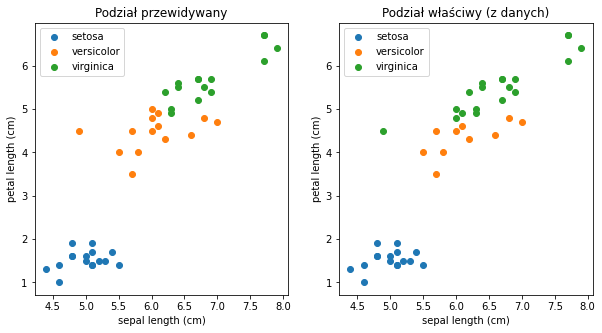

In [116]:
y_predict=model.predict(X_test[:,[x,y]])
fig,ax=plt.subplots(1,2,figsize=(10,5))
for i in range(3):
    maska=(y_predict == i)
    ax[0].scatter(X_test[:,x][maska],X_test[:,y][maska],label=irysy.target_names[i])
    ax[0].set(title='Podział przewidywany', xlabel=irysy.feature_names[x],ylabel=irysy.feature_names[y])
ax[0].legend()

for i in range(3):
    maska=(y_test == i)
    ax[1].scatter(X_test[:,x][maska],X_test[:,y][maska],label=irysy.target_names[i])
    ax[1].set(title='Podział właściwy (z danych)', xlabel=irysy.feature_names[x],ylabel=irysy.feature_names[y])
ax[1].legend()

# Klasteryzacja (uczenie nienadzorowane)
Przeprowadzimy klasteryzację kwiatów metodą $k$-średnich. Musimy ręcznie ustalić liczbę klastrów

In [121]:
from sklearn import cluster
liczba_grup=3
X=irysy.data
y=irysy.target
model=cluster.KMeans(liczba_grup)

In [122]:
model.fit(X) # w dopasowaniu nie używamy wyników - tak jakbyśmy ich nie znali

KMeans(n_clusters=3)

In [148]:
y_pred=model.predict(X)

In [147]:
(y_pred-y)==0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

Skąd tyle błędów? Po prostu model nadał inne numerki niż nasze oryginalne.

In [149]:
metrics.confusion_matrix(y, y_pred)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

In [150]:
maska0=(y_pred==0)
maska1=(y_pred==1)

y_pred[maska0]=1
y_pred[maska1]=0

In [153]:
np.sum((y_pred-y)!=0)

16

In [154]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

Zróbmy to samo bez definiowania liczby klastrów, np. za pomocą Mean-Shift Clustering.

In [159]:
model=cluster.MeanShift()
model.fit(X)
y_pred=model.predict(X)

In [160]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

# Redukcja wymiarowości (metoda PCA)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA

irysy = datasets.load_iris()
X = irysy.data
y = irysy.target
redukcja=PCA(n_components=2)
redukcja.fit(X)
#nie ma tu funkcji predict, ale funkcja transform
X_zredukowany=redukcja.transform(X)

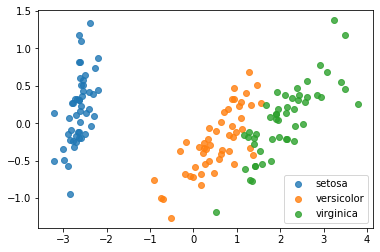

In [172]:
for i, target_name in zip([0, 1, 2], irysy.target_names):
    plt.scatter(
        X_zredukowany[y == i, 0], X_zredukowany[y == i, 1], alpha=0.8, label=target_name
    )
plt.legend()

Dane do PCA powinny być wstępnie przetworzone - powinny mieć średnią 0 i wariancję 1. [Przykład błędów bez przeskalowania](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py). Użyjemy w tym celu ```sklear.preprocessing.StandardScaler```

Zadbamy wszystko w konkretnym przykładzie analizy raka piersi.

In [228]:
from sklearn.datasets import load_breast_cancer
rak=load_breast_cancer()
rak_dane=rak.data
rak_dane.shape


(569, 30)

In [229]:
rak.target_names

array(['malignant', 'benign'], dtype='<U9')

In [230]:
rak_etykiety=rak.target
rak_etykiety.shape

(569,)

Żeby stworzyć DF z danymi i etykietami musimy skleić tablice ```rak_dane``` i ```rak_etykiety```, ale ta druga musi mieć najpierw dobry rozmiar.

In [231]:
rak_final=np.concatenate([rak_dane,rak_etykiety.reshape(569,1)],axis=1)

In [232]:
rak_DF=pd.DataFrame(rak_final,columns=np.concatenate([rak.feature_names,['etykiety']]))

In [233]:
rak_DF;

In [234]:
rak_DF['etykiety'].replace(0, 'złośliwy',inplace=True)
rak_DF['etykiety'].replace(1, 'łagodny',inplace=True)

Stworzyliśmy ładny DF do analizy. Ale do machine learningu potrzebujemy surowych danych.

In [235]:
x=rak_DF.drop(columns=['etykiety']).values
#nie chcemy pracować z gotowymi etykietkami. To zaburzyłoby rzutowanie. Nie potrzebujemy też nazw kategorii.

In [236]:
np.mean(x),np.std(x)

(61.89071233951961, 228.29740508276657)

In [3]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit(x).transform(x)

NameError: name 'x' is not defined

In [238]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

Teraz przechodzimy do właściwego rzutowania; na początek na dwie zmienne, żeby się dobrze robiło obrazek.

In [239]:
from sklearn.decomposition import PCA
pca_rak=PCA(n_components=2)
glowne_skladowe_rak=pca_rak.fit(x).transform(x)

In [240]:
gs_rak_DF=pd.DataFrame(data=glowne_skladowe_rak, columns=['skladowa1','skladowa2'])

In [241]:
gs_rak_DF.head()

,skladowa1,skladowa2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


Możemy teraz wydobyć z modelu informację na ile przejął on wariancję z pełnych danych:


In [212]:
pca_rak.explained_variance_ratio_

array([0.44272026, 0.18971182])

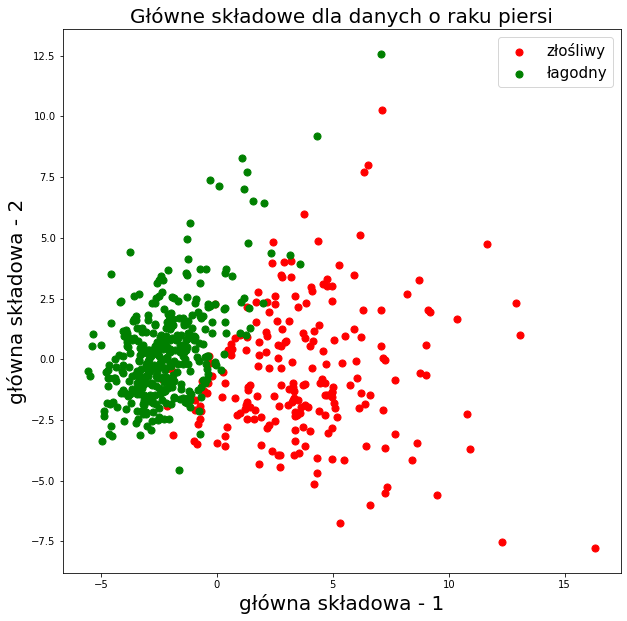

In [242]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot()
ax.set_xlabel('główna składowa - 1',fontsize=20)
ax.set_ylabel('główna składowa - 2',fontsize=20)
ax.set_title("Główne składowe dla danych o raku piersi",fontsize=20)
targets = ['złośliwy', 'łagodny']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    maska = rak_DF['etykiety'] == target
    ax.scatter(gs_rak_DF.loc[maska, 'skladowa1']
               , gs_rak_DF.loc[maska, 'skladowa2'], c = color, s = 50)

ax.legend(targets,prop={'size': 15})

Teraz możemy użyć któregoś z nadzorowanych klasyfikatorów (np. LogisticRegression)

In [243]:
model=linear_model.LogisticRegression()
model.fit(glowne_skladowe_rak,rak_etykiety)

LogisticRegression()

In [245]:
gs_etykiety_predict=model.predict(glowne_skladowe_rak)

In [248]:
metrics.confusion_matrix(gs_etykiety_predict,rak_etykiety)

array([[197,  10],
       [ 15, 347]], dtype=int64)

## Zadanie
Zbadaj zbiór danych o winach (```datasets.load_wine()```).

* Przeprowadź rzutowanie  w taki sposób, by przejęło ono co najmniej 90% wariancji. Ile jest liczbę głównych składowych?
* Przeprowadź klasyfikację metodą regresji logistycznej i określ jej jakość.

Uwaga: na zadanie trzeba patrzeć całościowo, a nie punkt po punkcie.

In [4]:
# ładowanie danych
wina=datasets.load_wine()
wina_X=wina.data
wina_y=wina.target
print(wina.feature_names)
print(wina.target_names)
print(wina_X.shape)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
(178, 13)


In [5]:
wina_DF=pd.DataFrame(data=wina_X, columns=wina.feature_names)
wina_DF

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [19]:
# Podział na zbiór testowy i uczący. Należy zrobić to przed standaryzacją, a tym bardziej przed rzutowaniem.
X_tr,X_test,y_tr,y_test=model_selection.train_test_split(wina_X,wina_y)

In [7]:
# Standaryzacja
scaler=StandardScaler()
scaler.fit(X_tr)
#tym samym skalowaniem przekształcamy zbiór uczący i testowy, żeby trafiały do tej samej przestrzeni
X_tr=scaler.transform(X_tr)
X_test=scaler.transform(X_test)

In [8]:
#definiujemy model rzutujący PCA z parametrem 0.9 i uczymy go. Następnie sprawdzamy ile wygenerował składowych
pca=PCA(0.9)
pca.fit(X_tr)
pca.n_components_

8

In [9]:
#Model pca jest wyćwiczony, ale teraz trzeba zrzutować dane. Znowu: zarówno uczące i testowe, żeby leżały w jednej przestrzeni.
X_tr=pca.transform(X_tr)
X_test=pca.transform(X_test)

In [10]:
#Teraz jesteśmy dopiero w miejscu, gdzie przeprowadzimy klasyfikację
model_LR=linear_model.LogisticRegression()
model_LR.fit(X_tr,y_tr)
y_pred=model_LR.predict(X_test)

Zobaczmy na ile model dopasował się do danych testowych, a ile do uczących

In [11]:
# na danych uczących
metrics.confusion_matrix(y_tr,model_LR.predict(X_tr))

array([[45,  0,  0],
       [ 0, 53,  0],
       [ 0,  0, 35]], dtype=int64)

In [12]:
# na danych testowych
metrics.confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]], dtype=int64)

In [13]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Przyspieszanie operacji - pipeline

In [26]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('skalowanie',StandardScaler()),
    ('redukcjaPCA',PCA()),
    ('klasyfikator',linear_model.LogisticRegression())
])

In [30]:
pipe.fit(X_tr,y_tr)
pipe.predict(X_tr)-y_tr
pipe.predict(X_test)-y_test

array([ 0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

## Preprocessing

Dotychczas używaliśmy StandardScaler. Porównajmy go oraz zastosowanie QuantileTransformer na [danych](https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata1.csv)

In [31]:
df=pd.read_csv('https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata1.csv')
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [32]:
df['z'].unique()

array(['a', 'b'], dtype=object)

In [34]:
X=df[['x','y']].values
y=df['z']=='a'

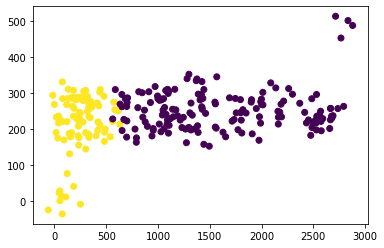

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y);

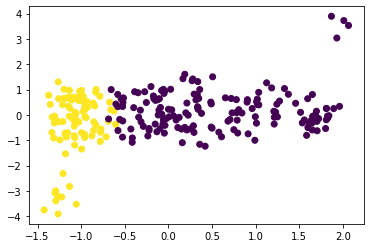

In [42]:
tr2=StandardScaler()
X2=tr2.fit_transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=y);

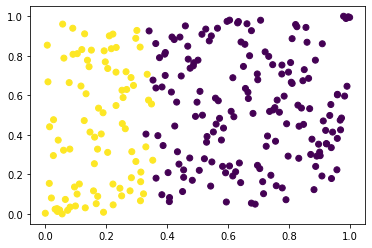

In [43]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
tr1=QuantileTransformer(n_quantiles=100)
X1=tr1.fit_transform(X)
plt.scatter(X1[:, 0], X1[:, 1], c=y);

## Zadanie
Spróbuj wstępnie obrobić [dane](https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata2.csv) i zastosować regresję logistyczną. Czy stosowanie StandardScaler lub QuantileTransformer jest dobre dla tych danych?

In [44]:
# Dane nie są ułożone liniowo, więc lepiej zastosować wielomianowy preprocessing np. PolynomialFeatures

## Preprocessing - dane kategoryczne

[Samouczek o preprocessingu](https://scikit-learn.org/stable/modules/preprocessing.html)

Zmiana danych kategorycznych na liczbowe:

* ```sklearn.preprocessing.OneHotEncoder```
* ```sklearn.preprocessing.OrdinarEncoder```

[Artykuł o przetwarzaniu etykiet](https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79)

## Wybrór najlepszego modelu
```sklearn.model_selection.GridSearchCV``` - przeprowadza analizę modelu dla szeregu wartości parametrów z automatycznym doborem na zbiory testowe i uczące (cross validation)

## Więcej o sklearn

[kurs sk-learn na youTube](https://www.youtube.com/watch?v=0B5eIE_1vpU)